In [5]:
import os 
import tensorflow as tf
from tensorflow.python.client import device_lib
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
from codes.utils import detections, predict_img, predict_img_cycle
from codes.models import sai_model, Generator, Discriminator
from codes.detection import Img_localize

test_model = sai_model()
test_model.load_weights("./check_classification/my_checkpoint")

ERROR! Session/line number was not unique in database. History logging moved to new session 785


In [3]:
generator = Generator()
discriminator = Discriminator()

generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

checkpoint_dir = './checkpoints_pix2pix'
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

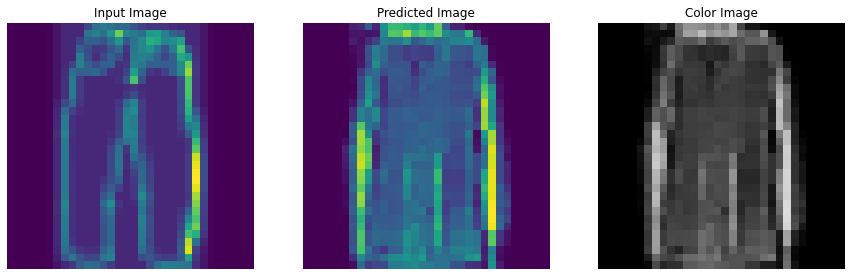

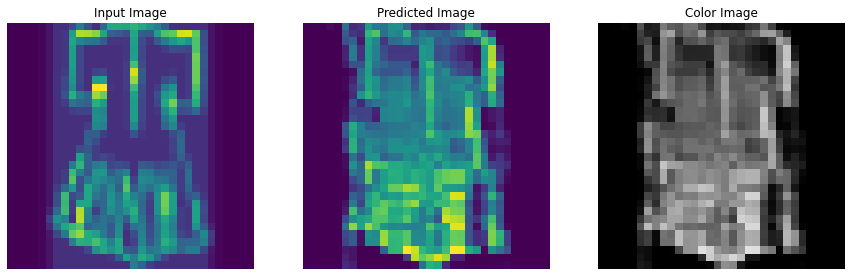

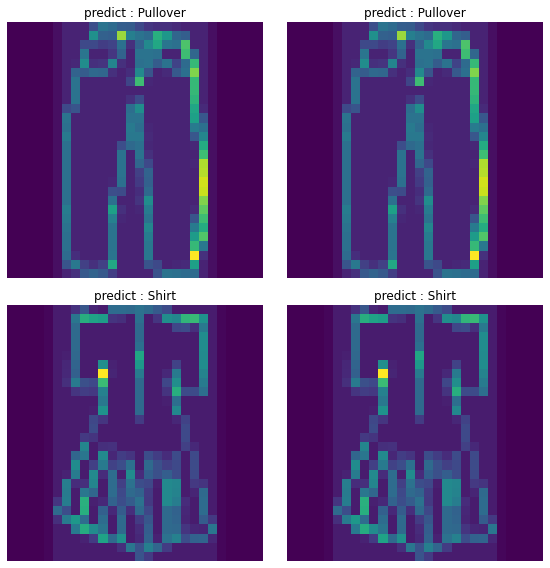

In [21]:
path = os.path.join(os.getcwd(), 'img/test1.png')
imgs = Img_localize(path, 2, "absorption")

for img in imgs:
    predict_img(generator, img)
predict_img_cycle(imgs, test_model, generator)

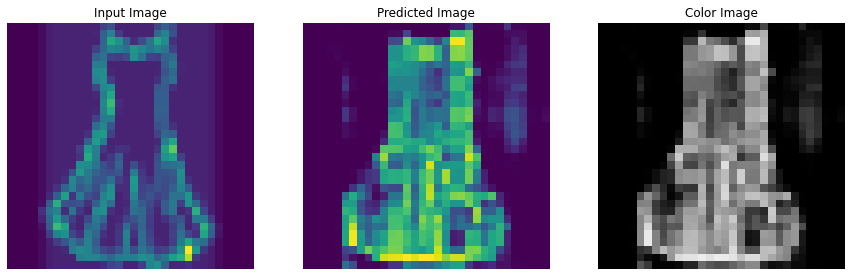

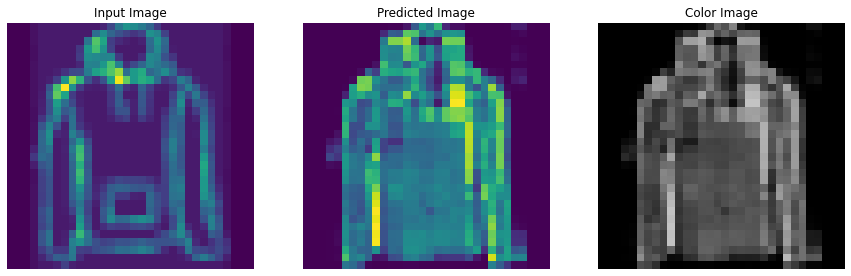

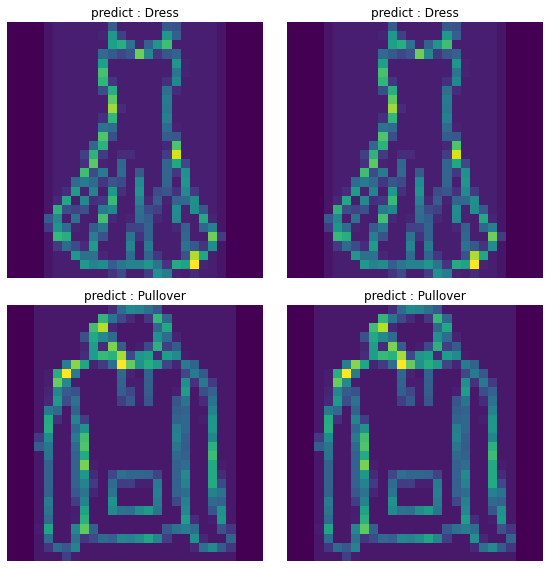

In [22]:
path = os.path.join(os.getcwd(), 'img/test2.png')
imgs = Img_localize(path, 2, "absorption")

for img in imgs:
    predict_img(generator, img)
predict_img_cycle(imgs, test_model, generator)